# Hypothesis:
H0: The proportion of Class I recalls in states won by Trump in the 2016 Presidential Election for the two years prior to January 20, 2017 is equal to the proportion of Class I recalls in those states in the two years after January 20, 2017 (inclusive). 

H1: The proportion of Class I recalls in states won by Trump in the 2016 Presidential Election for the two years prior to January 20, 2017 is not equal to the proportion of Class I recalls in those states in the two years after January 20, 2017 (inclusive).


# Hypothesis:
H0: The proportion of Class 1 (most serious) recalls in the two years prior to January 20, 2017 is greater than or equal to the proportion of Class 1 recalls in the two years following January 20, 2017 (inclusive).

H1: The proportion of Class 1 (most serious) recalls in the two years prior to January 20, 2017 is less than the proportion of Class 1 recalls in the two years following January 20, 2017 (inclusive).

# Hypothesis:
H0: The proportion of mandatory recalls in the two years prior to January 20, 2017 is greater than or equal to the proportion of mandatory recalls in the two years following January 20, 2017 (inclusive).

H1: The proportion of mandatory recalls in the two years prior to January 20, 2017 is less than the proportion of mandatory recalls in the two years following January 20, 2017 (inclusive).


# Hypothesis:
H0: The proportion of voluntary recalls in states won by Trump in the 2016 Presidential Election for the two years prior to January 20, 2017 is equal to the proportion of voluntary recalls in those states in the two years after January 20, 2017 (inclusive). 

H1: The proportion of voluntary recalls in states won by Trump in the 2016 Presidential Election for the two years prior to January 20, 2017 is not equal to the proportion of voluntary recalls in those states in the two years after January 20, 2017 (inclusive).


In [1]:
# import libraries
from fda_helper_functions import *
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Connect to database and run SQL query to select appropriate columns
fda_recall = sql_connect_query()

In [3]:
# States won by Hillary Clinton 2016 Presidential Elections
blue_states = states_won_clinton()
# Feature Engineering - new cols (inititation_year and Class_1) - drop rows with initiatiation_year not between 2012 and 2018
feature_engineering(fda_recall, blue_states)
# Create pre_trump and post_trump dataframes based on a 2-year window based on the 2016 Presidential Elections inauguration date
pre_trump, post_trump = set_df_mask(fda_recall)
# Filter dataframes pre and post Trump Presidential Election by Class I severity and by FDA recall mandate
pre_trump_class_1, post_trump_class_1, pre_trump_vol, post_trump_vol = set_df_new_mask(pre_trump, post_trump)

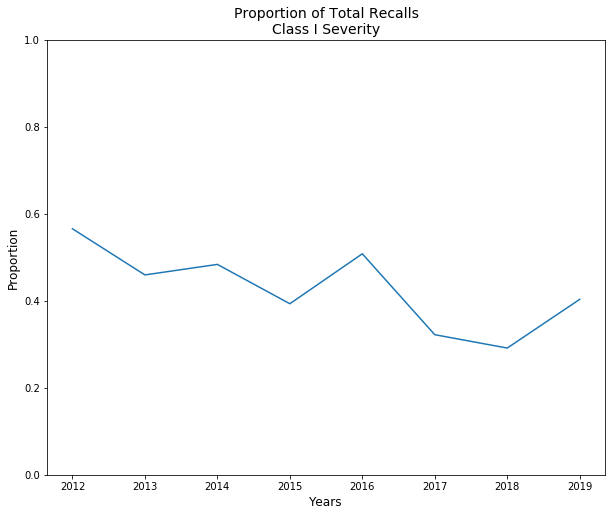

In [4]:
# Plot the proportion/year of FDA recalls by Class I severity 
plot_recalls(fda_recall, 'initiation_year', 'Class_1', 'Proportion of Total Recalls\nClass I Severity')

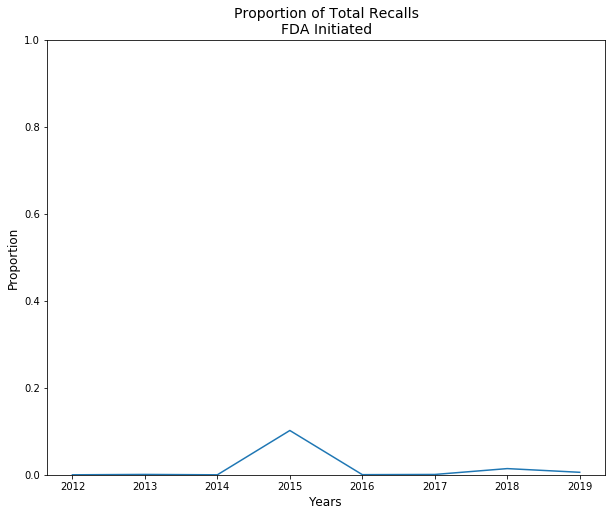

In [5]:
# Plot the proportion/year of total FDA recalls 
plot_recalls(fda_recall, 'initiation_year', 'FDA_initiated', 'Proportion of Total Recalls\nFDA Initiated')

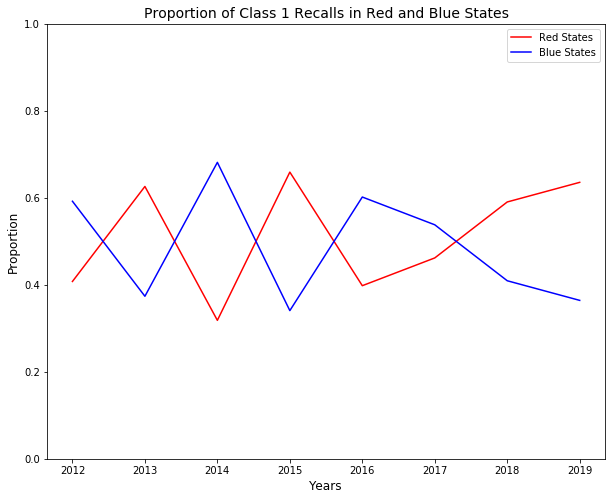

In [6]:
# Plot the proportion of class I severity/year brokendown by red and blue states
plot_red_blue_states_recalls(fda_recall, 'initiation_year', 'red_states')

In [7]:
# Hypothesis 1
get_ztest(pre_trump_class_1,post_trump_class_1,'red_states','larger')

p-value: 0.655
z-statistic: -0.4


In [8]:
# Hypothesis 2
get_ztest(pre_trump,post_trump,'Class_1','larger')

p-value: 0.000
z-statistic: 15.6


In [9]:
# Hypothesis 3
get_ztest(pre_trump,post_trump,'FDA_initiated','larger')

p-value: 0.000
z-statistic: 12.57


In [10]:
# Hypothesis 4
get_ztest(pre_trump_vol,post_trump_vol,'red_states','larger')

p-value: 0.000
z-statistic: 12.27
